# Задача 1

Рещаем однородное уравнение переноса: 
$$
\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0
$$
где $с = const > 0$, $-\infty < x < \infty$, $u(0,x) = \phi(x)$
По условию $\phi(x)$:
$$
\phi(x) = 
\begin{cases}
1, &x \le 0\\
exp(-\frac{x^2}{\delta^2}), &x > 0
\end{cases}
$$

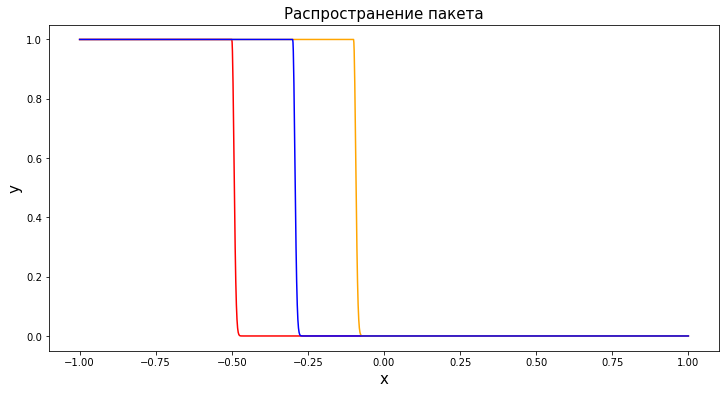

In [4]:
import scipy
import numpy as np
import math
import matplotlib.pyplot as plt
def func(x,delta):
    if x<0:
        return 1;
    else:
        return math.exp(-(x)*(x)/(delta*delta))
    
a=-1.
b=1.
c=0.5
h=0.001
T=1000
t=0.001
r=c*t/h
delta=0.01
x=np.arange(a,b+h,h)
y=np.random.random([T,len(x)])
u=np.random.random([T,len(x)])
for i in range(0,T):
    y[i][0]=1
for i in range(0,len(x)):
    y[0][i]=func(x[i]+0.5,delta)
for i in range(0,T):
    for j in range(0,len(x)):
        u[i][j]=func(x[j]+0.5-c*t*i,delta)


fig=plt.figure(figsize=(12,6))
plt.title("Распространение пакета",fontsize=15)
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.plot(x,u[0],"-",color='red')
plt.plot(x,u[800],"-",color='orange')
plt.plot(x,u[400],"-",color='blue')
plt.show()

Решаем с помощью схемы "неявный левый уголок"

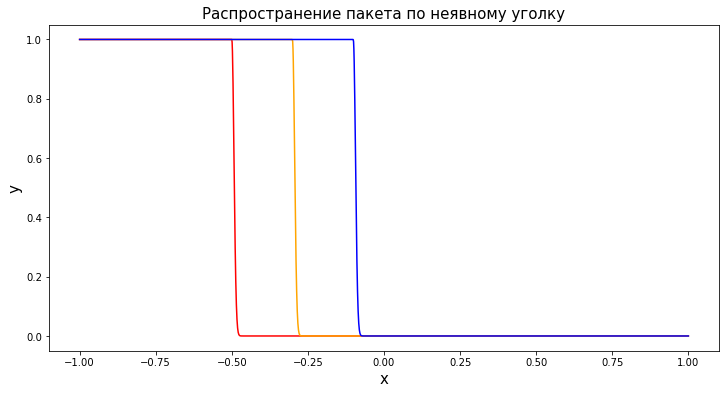

In [2]:
for i in range(0,T-1):
    for j in range(1,len(x)):
        #y[i+1][j]=y[i][j]-r*(u[i][j]-u[i][j-1])
        y[i+1][j]=(r*y[i][j] + u[i][j]) / (1 + r)
fig=plt.figure(figsize=(12,6))
plt.title("Распространение пакета по неявному уголку",fontsize=15)
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.plot(x,y[0],"-",color='red')
plt.plot(x,y[400],"-",color='orange')
plt.plot(x,y[800],"-",color='blue')
plt.show()

TVD схема

<ipython-input-6-995cc0321b29>:11: RuntimeWarning: invalid value encountered in double_scalars
  q[0][i]=(f[0][i]-f[0][i-1])/(f[0][i+1]-f[0][i])
<ipython-input-6-995cc0321b29>:11: RuntimeWarning: divide by zero encountered in double_scalars
  q[0][i]=(f[0][i]-f[0][i-1])/(f[0][i+1]-f[0][i])


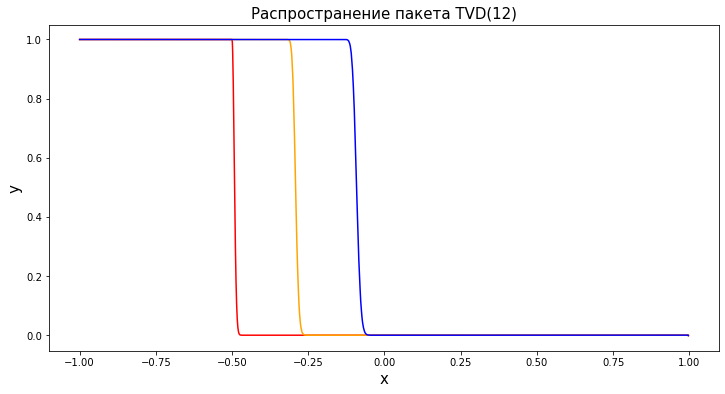

In [6]:
f=np.random.random([T,len(x)])
for i in range(0,T):
    f[i][0]=1
for i in range(0,len(x)):
    f[0][i]=func(x[i]+0.5,delta)
f_2=np.random.random([T,len(x)-1])
q=np.random.random([T,len(x)-1])
for i in range(0,T):
    q[i][0]=1
for i in range(1,len(x)-1):
    q[0][i]=(f[0][i]-f[0][i-1])/(f[0][i+1]-f[0][i])
for i in range(0,len(x)-1):
    f_2[0][i]=f[0][i]+(f[0][i+1]-f[0][i])*(1-r)/2*max(0,min(1,q[0][i]))
for i in range(0,T-1):
    for j in range(0,len(x)-1):
        f_2[i][j]=f[i][j]+(f[i][j+1]-f[i][j])*(1-r)/2*max(0,min(1,q[i][j]))
    for j in range(1,len(x)-1):
        f[i+1][j]=f[i][j]-r*(f_2[i][j]-f_2[i][j-1])
xx=np.arange(a,b-2*h,h)
ff=np.random.random([T,len(x)-3])
uu=np.random.random([T,len(x)-3])
yy=np.random.random([T,len(x)-3])
for i in range(0,T):
    for j in range(0,len(x)-3):
        ff[i][j]=f[i][j]
        uu[i][j]=u[i][j]
        yy[i][j]=y[i][j]
fig=plt.figure(figsize=(12,6))
plt.title("Распространение пакета TVD(12)",fontsize=15)
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.plot(xx,ff[0],"-",color='red')
plt.plot(xx,ff[400],"-",color='orange')
plt.plot(xx,ff[800],"-",color='blue')
plt.show()

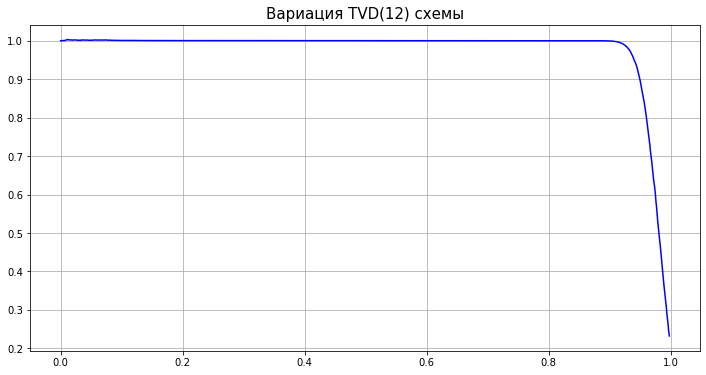

In [5]:
tv_sum = np.zeros(T - 1)
tv = np.zeros(T - 1)
for i in range(T - 1):
    for j in range(T - 1):
        tv_sum[j] = math.fabs(ff[i][j+1] - ff[i][j])
    tv[i] = sum(tv_sum)

x_len = np.zeros(T - 1)
for i in range(T - 1):
    x_len[i] = i*0.001
fig=plt.figure(figsize=(12,6))
plt.title("Вариация TVD(12) схемы",fontsize=15)
plt.grid()
plt.plot(x_len,tv,"-",color='blue')

Схема Лакса-Вендерофа

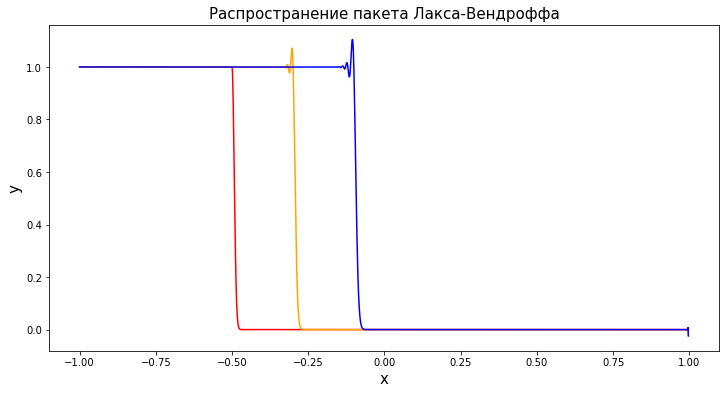

In [7]:
k=np.random.random([T,len(x)])
for i in range(0,T):
    k[i][0]=1
for i in range(0,len(x)):
    k[0][i]=func(x[i]+0.5,delta)
k_2=np.random.random([T,len(x)-1])
for i in range(0,len(x)-1):
    k_2[0][i]=k[0][i]+(k[0][i+1]-k[0][i])*(1-r)/2
for i in range(0,T-1):
    for j in range(0,len(x)-1):
        k_2[i][j]=k[i][j]+(k[i][j+1]-k[i][j])*(1-r)/2
    for j in range(1,len(x)-1):
        k[i+1][j]=k[i][j]-r*(k_2[i][j]-k_2[i][j-1])
kk=np.random.random([T,len(x)-3])
for i in range(0,T):
    for j in range(0,len(x)-3):
        kk[i][j]=k[i][j]
fig=plt.figure(figsize=(12,6))     
plt.title("Распространение пакета Лакса-Вендроффа",fontsize=15)
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.plot(xx,kk[0],"-",color='red')
plt.plot(xx,kk[400],"-",color='orange')
plt.plot(xx,kk[800],"-",color='blue')
plt.show()

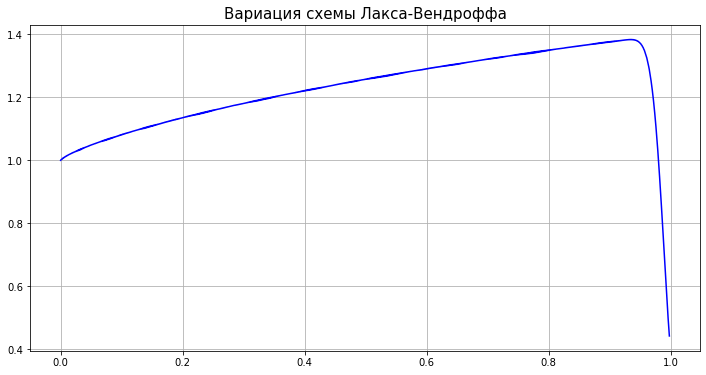

In [7]:
tv_sum = np.zeros(T - 1)
tv = np.zeros(T - 1)
for i in range(T - 1):
    for j in range(T - 1):
        tv_sum[j] = math.fabs(kk[i][j+1] - kk[i][j])
    tv[i] = sum(tv_sum)

x_len = np.zeros(T - 1)
for i in range(T - 1):
    x_len[i] = i*0.001
fig=plt.figure(figsize=(12,6))
plt.title("Вариация схемы Лакса-Вендроффа",fontsize=15)
plt.grid()
plt.plot(x_len,tv,"-",color='blue')

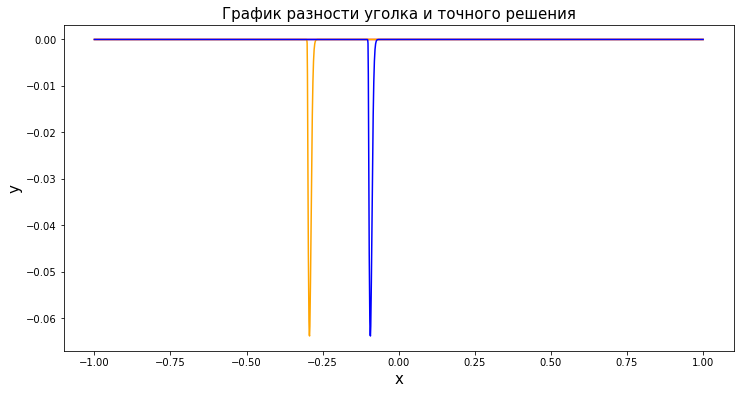

In [8]:
fig=plt.figure(figsize=(12,6))
plt.title("График разности уголка и точного решения",fontsize=15)
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.plot(x,y[0]-u[0],"-",color='red')
plt.plot(x,y[400]-u[400],"-",color='orange')
plt.plot(x,y[800]-u[800],"-",color='blue')
plt.show()

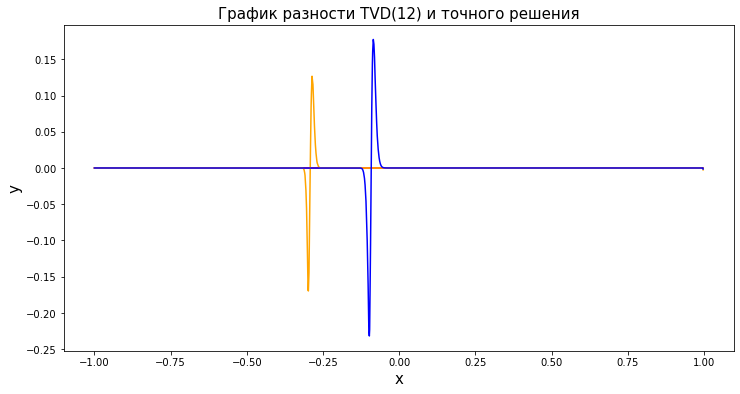

In [9]:
fig=plt.figure(figsize=(12,6))
plt.title("График разности TVD(12) и точного решения",fontsize=15)
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.plot(xx,ff[0]-uu[0],"",color='red')
plt.plot(xx,ff[400]-uu[400],"-",color='orange')
plt.plot(xx,ff[800]-uu[800],"-",color='blue')
plt.show()

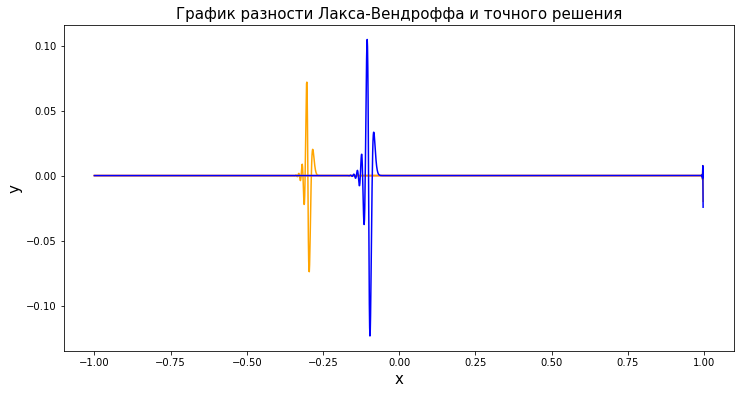

In [10]:
fig=plt.figure(figsize=(12,6))
plt.title("График разности Лакса-Вендроффа и точного решения",fontsize=15)
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.plot(xx,kk[0]-uu[0],"-",color='red')
plt.plot(xx,kk[400]-uu[400],"-",color='orange')
plt.plot(xx,kk[800]-uu[800],"-",color='blue')
plt.show()

In [11]:
print("Погрешности для Явного уголока")
print("Максимальная погрешность: ", max(abs(u[800]-y[800])))
print("Среднеквадратичная погрешность: ", 1/len(x)*np.sum(abs(u[800]-y[800])*abs(u[800]-y[800])))
print()
print("Погрешноси для TVD(12)")
print("Максимальная погрешность: ", max(abs(uu[800]-ff[800])))
print("Среднеквадратичная погрешность: ", 1/len(xx)*np.sum(abs(uu[800]-ff[800])*abs(uu[800]-ff[800])))
print()
print("Погрешноси для Лакса-Вендроффа")
print("Максимальная погрешность: ", max(abs(uu[800]-kk[800])))
print("Среднеквадратичная погрешность: ", 1/len(xx)*np.sum(abs(uu[800]-kk[800])*abs(uu[800]-kk[800])))

Погрешности для Явного уголока
Максимальная погрешность:  0.06386507317582357
Среднеквадратичная погрешность:  1.7510691784846933e-05

Погрешноси для TVD(12)
Максимальная погрешность:  0.23177470352875984
Среднеквадратичная погрешность:  0.00036023838262994767

Погрешноси для Лакса-Вендроффа
Максимальная погрешность:  0.12345484595337564
Среднеквадратичная погрешность:  8.058073711775941e-05
